In [100]:
# Importing Packages to run Pandas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

#Some commented out stuff I may use later.

#from __future__ import print_function

#from sklearn.datasets import fetch_20newsgroups
#from sklearn.decomposition import TruncatedSVD
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import HashingVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import Normalizer
#from sklearn import metrics

#from sklearn.cluster import KMeans, MiniBatchKMeans

#import logging
#from optparse import OptionParser
#import sys
#from time import time

#Gets current working directory, and prints it.

# os.getcwd()
# print (os.getcwd())


In [101]:
## Importing Roster as is, column 0 = 'ID', column 2 = 'Last, First'

Roster = pd.read_excel('C2018_CalcBC_Roster.xlsx')

Roster.head()

,ID,"Last, First"
0,306001000,"Aboagye, Britney"
1,301001336,"Bakare, Monica"
2,303001013,"Brailsford-Forde, Taj-Jahnae"
3,306001234,"Butisingh, D'Andre"
4,301001384,"Cortes, Veronica"


In [102]:
## Importing Info Sheet for Questions

InfoSheet = pd.read_excel('1718_Q3_Math_AP Calculus BC_TestInfoPage_vF.xlsx', sheet_name=2, skiprows=9)
InfoSheet = InfoSheet.applymap(str)
InfoSheet_temp = InfoSheet.loc[:,['Question Number','(Primary) Standard','(Secondary) OPTIONAL: Additional Standard', 'MC, OER (Question Group)', 'Correct Answer']] 
InfoSheet = InfoSheet_temp

InfoSheet.head()

,Question Number,(Primary) Standard,(Secondary) OPTIONAL: Additional Standard,"MC, OER (Question Group)",Correct Answer
0,1,UHAI.HS.APCalc.Derivatives.1C.Calculate,UHAI.HS.Calc.03.ChainRule,MC,A
1,2,UHAI.HS.APCalc.Integrals.3B.Calculate,UHAI.HS.Calc.06.EvaluationTh,MC,C
2,3,UHAI.HS.APCalc.Derivatives.1C.Calculate,UHAI.HS.Calc.10.ParaSlope,MC,B
3,4,UHAI.HS.APCalc.Integrals.4A.Interpret,UHAI.HS.Calc.07.IntAntiChain,MC,D
4,5,UHAI.HS.APCalc.Derivatives.1C.Calculate,UHAI.HS.Calc.03.Implicit,MC,C


In [103]:
## Importing Old Student Responses

OldResponses = pd.read_excel('1617_APCalcBC_Q3IA_studentresponses.xls')
OldResponses = OldResponses.applymap(str)
df1 = OldResponses.loc[:,'Local Student Id']
df2 = OldResponses.loc[:,'Q1':'O6D']
list2 = [df1, df2] 
OldResponses = pd.concat(list2, axis=1)

OldResponses.head()

,Local Student Id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,O4B,O4C,O5A,O5B,O5C,O5D,O6A,O6B,O6C,O6D
0,306001153,A,C,B,A,B,A,A,B,B,...,0,0,2,1,0,0,0,0,0,0
1,301001344,A,C,A,D,C,B,A,C,C,...,1,3,2,2,3,0,0,0,0,0
2,303001210,A,C,A,B,C,C,A,C,C,...,0,3,2,0,0,0,0,0,0,0
3,301001281,C,C,C,A,C,A,A,C,A,...,1,2,2,2,0,0,0,0,0,0
4,306001136,A,C,C,A,C,A,A,C,B,...,0,3,2,2,2,0,3,2,0,0


In [104]:
## Importing New Student Responses

NewResponses = pd.read_excel('1718_APCalcBC_Q3IA_studentresponses.xls')
NewResponses = NewResponses.applymap(str)
df1 = NewResponses.loc[:,'Local Student Id']
df2 = NewResponses.loc[:,'Q1':'O6D']
list2 = [df1, df2] 
NewResponses = pd.concat(list2, axis=1)

NewResponses.head()

,Local Student Id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,O4B,O4C,O5A,O5B,O5C,O5D,O6A,O6B,O6C,O6D
0,306001000,A,C,D,A,B,A,A,B,A,...,0,0,2,2,0,0,1,0,0,0
1,301001323,C,C,C,A,C,A,A,C,C,...,0,3,2,2,0,0,1,0,0,0
2,301001331,B,C,C,D,C,C,A,B,D,...,0,0,2,2,0,0,0,0,0,0
3,301001502,A,C,B,D,B,A,A,C,D,...,0,3,0,2,0,1,4,2,0,1
4,301001336,B,C,C,A,C,A,A,B,B,...,0,0,2,2,0,0,3,0,0,0


In [105]:
# Run Percent Correct on a given question

InfoSheet_mat = InfoSheet.as_matrix()
OldResponses_mat = OldResponses.as_matrix()
NewResponses_mat = NewResponses.as_matrix()
AnsColumn = InfoSheet.columns.get_loc("Correct Answer")

Question = 1
CorrectAns = InfoSheet_mat[Question-1, AnsColumn]
print('Correct Answer: ', CorrectAns)

nStudents = len(NewResponses_mat[:,1])
countCorrect = 0
for i in range(0, nStudents):
    if NewResponses_mat[i, Question] == CorrectAns:
        countCorrect += 1

percentCorrect = int((10000*countCorrect/nStudents))
percentCorrect = percentCorrect/100

print('Students Correct: ', countCorrect)
print('Perent Correct: ', percentCorrect, '%')

Correct Answer:  A
Students Correct:  28
Perent Correct:  77.77 %


In [121]:
## Creating Sparse Matrix for Student Responses

OldMultipleChoice = OldResponses.loc[:,'Q1':'Q90']

## Create Category Labels for the Sparse Matrix

SparseQuestions = pd.Series([]);
question = 0
for i in OldMultipleChoice.columns.values:
    SparseQuestions[question] = i + "A"
    SparseQuestions[question+1] = i + "B"
    SparseQuestions[question+2] = i + "C"
    SparseQuestions[question+3] = i + "D"
    question = question + 4;

# Iterate through the original multiple choice set to create the Sparse Matrix
    
SparseResponses = pd.DataFrame(0,OldMultipleChoice.index.values,SparseQuestions)

for m in OldMultipleChoice.index:
    for i in OldMultipleChoice.columns.values:
        if OldMultipleChoice.loc[m,i] == "A":
            SparseResponses.loc[m,i + "A"] = 1    
        elif OldMultipleChoice.loc[m,i] == "B":
            SparseResponses.loc[m,i + "B"] = 1    
        elif OldMultipleChoice.loc[m,i] == "C":
            SparseResponses.loc[m,i + "C"] = 1     
        elif OldMultipleChoice.loc[m,i] == "D":
            SparseResponses.loc[m,i + "D"] = 1    
            
SparseResponses


## Creating Sparse Matrix for Student Responses

NewMultipleChoice = NewResponses.loc[:,'Q1':'Q90']

## Create Category Labels for the Sparse Matrix

SparseQuestions2 = pd.Series([]);
question = 0
for i in NewMultipleChoice.columns.values:
    SparseQuestions2[question] = i + "A"
    SparseQuestions2[question+1] = i + "B"
    SparseQuestions2[question+2] = i + "C"
    SparseQuestions2[question+3] = i + "D"
    question = question + 4;

# Iterate through the original multiple choice set to create the Sparse Matrix
    
SparseResponses2 = pd.DataFrame(0,NewMultipleChoice.index.values,SparseQuestions2)

for m in NewMultipleChoice.index:
    for i in NewMultipleChoice.columns.values:
        if NewMultipleChoice.loc[m,i] == "A":
            SparseResponses2.loc[m,i + "A"] = 1    
        elif NewMultipleChoice.loc[m,i] == "B":
            SparseResponses2.loc[m,i + "B"] = 1    
        elif NewMultipleChoice.loc[m,i] == "C":
            SparseResponses2.loc[m,i + "C"] = 1     
        elif NewMultipleChoice.loc[m,i] == "D":
            SparseResponses2.loc[m,i + "D"] = 1    
            

In [122]:
## Convert MC Responses to Binary

BooleanResponses = pd.DataFrame(0,OldMultipleChoice.index.values,OldMultipleChoice.columns.values)
question = 0
for m in OldMultipleChoice.index:
    for i in OldMultipleChoice.columns.values:
        if OldMultipleChoice.loc[m,i] == InfoSheet.loc[question,'Correct Answer']:
            BooleanResponses.loc[m,i] = 1    
        else:
            BooleanResponses.loc[m,i] = 0
        question = question + 1
    question = 0
   
BooleanResponses2 = pd.DataFrame(0,NewMultipleChoice.index.values,NewMultipleChoice.columns.values)
question = 0
for m in NewMultipleChoice.index:
    for i in NewMultipleChoice.columns.values:
        if NewMultipleChoice.loc[m,i] == InfoSheet.loc[question,'Correct Answer']:
            BooleanResponses2.loc[m,i] = 1    
        else:
            BooleanResponses2.loc[m,i] = 0
        question = question + 1
    question = 0
   

In [123]:
### Create Student/MC/FRQ DataFrame

SectionSummary = pd.DataFrame(0,OldResponses.index.values,columns=['ID','MC','FRQ'])
SectionSummary.loc[:,'ID'] = OldResponses.loc[:,'Local Student Id']
FRQs = OldResponses.loc[:,'O1A':'O6D'].applymap(int)

### Find MC/FRQ Percentage
for m in SectionSummary.index:
    SectionSummary.loc[m,'MC'] = np.rint(sum(BooleanResponses.loc[m,:])/45*100)
    SectionSummary.loc[m,'FRQ'] = np.rint(sum(FRQs.loc[m,'O1A':'O6D'])/54*100)
SectionSummary

### Create Student/MC/FRQ DataFrame

SectionSummary2 = pd.DataFrame(0,NewResponses.index.values,columns=['ID','MC','FRQ'])
SectionSummary2.loc[:,'ID'] = NewResponses.loc[:,'Local Student Id']
FRQs2 = NewResponses.loc[:,'O1A':'O6D'].applymap(int)

### Find MC/FRQ Percentage
for m in SectionSummary2.index:
    SectionSummary2.loc[m,'MC'] = np.rint(sum(BooleanResponses2.loc[m,:])/45*100)
    SectionSummary2.loc[m,'FRQ'] = np.rint(sum(FRQs2.loc[m,'O1A':'O6D'])/54*100)
SectionSummary2

,ID,MC,FRQ
0,306001000,36.0,17.0
1,301001323,49.0,41.0
2,301001331,44.0,17.0
3,301001502,69.0,59.0
4,301001336,47.0,48.0
5,303001013,82.0,85.0
6,303001014,42.0,37.0
7,306001234,64.0,52.0
8,303001017,56.0,44.0
9,301001384,51.0,31.0


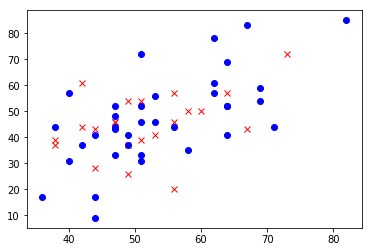

In [127]:
plt.plot(SectionSummary.loc[:,'MC'],SectionSummary.loc[:,'FRQ'], 'rx')
plt.plot(SectionSummary2.loc[:,'MC'],SectionSummary2.loc[:,'FRQ'], 'bo')
plt.show()